# The Sparks Foundation
Domain - Data Science & Business Analytics


Task 1 - Prediction using Supervised ML

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import data

In [2]:
df=pd.read_csv("Student_marks.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Explore the data

In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualize

Text(0, 0.5, 'Scores')

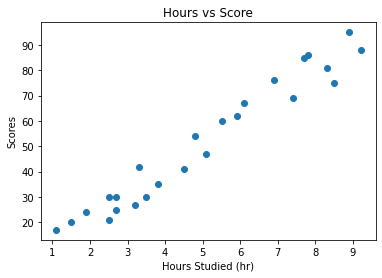

In [6]:
plt.scatter(df['Hours'], df['Scores'])
plt.title('Hours vs Score')
plt.xlabel('Hours Studied (hr)')
plt.ylabel('Scores')
#plt.show()

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We observe that there is linear relation between Hours and Scores

Therefore we proceed to train linear regression model without train test split

In [8]:
#Seperate dependant and Independant variables
X=df.iloc[:,:-1]
y=df.iloc[:,1]

# Train test split

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Train and Test linear regression model

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression()

In [11]:
y_pred = regressor.predict(x_test) # Predicting the scores

In [12]:
y_pred

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

In [13]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred)) 

Mean Absolute Error: 4.499999999999998


In [14]:
line = regressor.coef_*X + regressor.intercept_

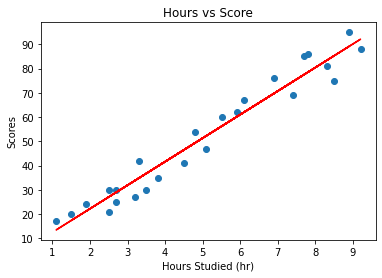

In [15]:
plt.scatter(X,y)
plt.title('Hours vs Score')
plt.xlabel('Hours Studied (hr)')
plt.ylabel('Scores')
plt.plot(X, line,color='r');

In [16]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
score

0.9427788055899853

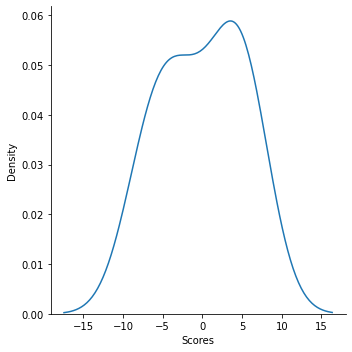

In [17]:
sns.displot(y_pred-y_test,kind='kde')

# Predict score for new datapoint hour = 9.25

In [18]:
hr = 9.25
pred = regressor.predict([[hr]])
#print(pred)
print("No of Hours = {}".format(hr))
print("Predicted Score = {}".format(pred[0]))


No of Hours = 9.25
Predicted Score = 92.61670033840096


# Pruning the model

In [19]:
import numpy

test_size=np.arange(0.1, 0.31, 0.1)
mse_={}

for i in test_size:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 42)
    regressor.fit(x_train, y_train) 
    y_pred = regressor.predict(x_test)
    mse=metrics.mean_absolute_error(y_test,y_pred)
    mse_[i]=mse
    
temp = min(mse_.values())
res = [key for key in mse_ if mse_[key] == temp]
    

In [20]:
mse_

{0.1: 3.9657593887812133,
 0.2: 3.9207511902099244,
 0.30000000000000004: 4.499999999999998}

In [21]:
res  #Best test size

[0.2]

In [22]:
mse_[0.2]  

3.9207511902099244

In [23]:
rand_state=np.arange(0,1001,1)
mse_={}
for i in rand_state:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    regressor.fit(x_train, y_train) 
    y_pred = regressor.predict(x_test)
    mse=metrics.mean_absolute_error(y_test,y_pred)
    mse_[i]=mse
    
temp = min(mse_.values())
res = [key for key in mse_ if mse_[key] == temp]

In [33]:
#mse_

In [25]:
res

[666]

In [26]:
mse_[666] #Best random state

3.249155453337118

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 666)
regressor.fit(x_train, y_train) 
y_pred = regressor.predict(x_test)

In [28]:
line = regressor.coef_*X + regressor.intercept_

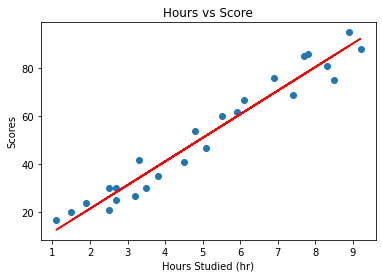

In [29]:
plt.scatter(X,y)
plt.title('Hours vs Score')
plt.xlabel('Hours Studied (hr)')
plt.ylabel('Scores')
plt.plot(X, line,color='r');

In [30]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)
score

0.9384920360982298

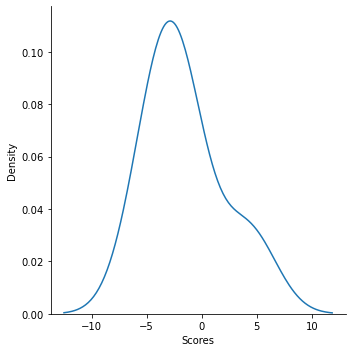

In [31]:
sns.displot(y_pred-y_test,kind='kde')

In [32]:
hr = 9.25
pred = regressor.predict([[hr]])
#print(pred)
print("No of Hours = {}".format(hr))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 92.82920145163456
